# Anomaly Detection

Anomaly detection also called outlier detection, is a process of finding patterns or behaviours in a dataset that deviate significantly from the expected or “normal behavior.”

Anomalies are out-of-norm instances or behaviours, they cover both outliers and novelties.

Outliers are are data points that deviate significantly from the rest of the data

Different types of anomalies are point anomalies, contextual anomalies and collective anomalies.

This is used in security alerts, fraud detection and observability.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.mad import MAD
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.models.pca import PCA
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

## Univariate anomaly detection

Datasets

In [3]:
diamonds = sns.load_dataset("diamonds")
# Extract the feature we want
X = diamonds[["price"]]

Initialize Median Absolute Deviation (MAD)

In [4]:
mad = MAD()

In [5]:
mad.fit(X)

MAD(contamination=0.1, threshold=3.5)

Extract outlier labels

In [7]:
labels = mad.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

Create dataframe and extract values of outliers in category '0'

In [8]:
pd.Series(labels).value_counts()

0    49708
1     4232
Name: count, dtype: int64

## Multivariate Anomaly Detection

Synthetic Dataset

In [10]:
X_train, y_train = generate_data(train_only=True)

Dataframe

In [11]:
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train

df_train.head()

,0,1,y
0,2.112600,1.195812,0.0
1,2.102088,1.052754,0.0
2,1.997627,1.627528,0.0
3,1.228028,2.745553,0.0
4,3.336480,2.099700,0.0


Text(0.5, 1.0, 'Ground Truth')

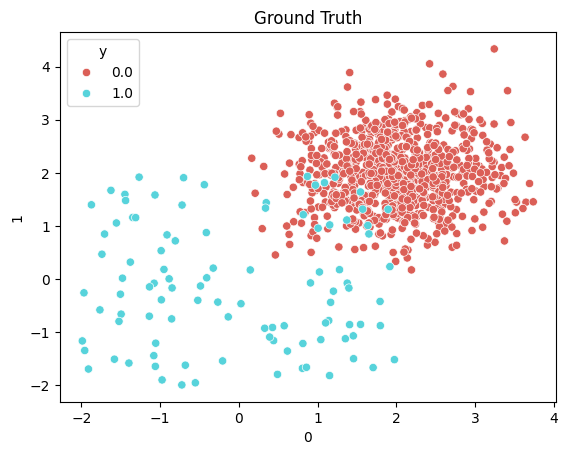

In [14]:
sns.scatterplot(x=0, y=1, hue='y', data=df_train, palette="hls", legend="full")
plt.title('Ground Truth')

Initialize Principal Component Analysis (PCA) for best results

In [15]:
clf = PCA()

In [16]:
clf.fit(X_train)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

Store predictions in array as 0s and 1s

In [17]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

Visualize

Text(0.5, 1.0, 'Anomaly Scores by PCA')

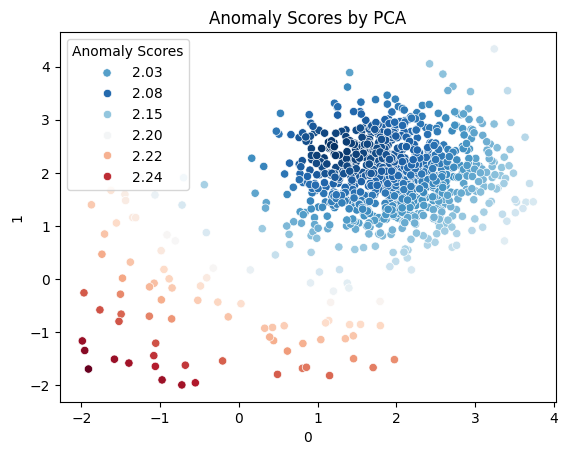

In [18]:
ax = sns.scatterplot(x=0, y=1, hue=y_train_scores, data=df_train, palette="RdBu_r")

legend_labels = [f"{score:.2f}" for score in np.unique(y_train_scores)]  # Format scores up to 2 decimal places
ax.legend(title="Anomaly Scores", labels=legend_labels)  # Create legend with title and labels
plt.title('Anomaly Scores by PCA')